In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [355]:
import pandas as pd
import os

# List of CSV filenames
file_names = [
    '2010-11 NBA - Sheet1.csv', '2003-04 NBA - Sheet1.csv',
    '2004-05 NBA - Sheet1 (1).csv', '2009-10 NBA - Sheet1.csv',
    '2021-22 NBA - Sheet1.csv', '2018-19 NBA - Sheet1 (1).csv',
    '2013-14 NBA - Sheet1.csv', '2019-20 NBA - Sheet1.csv',
    '2012-13 NBA - Sheet1.csv', '2020-21 NBA - Sheet1.csv',
    '2016-17 NBA - Sheet1.csv', '2017-18 NBA - Sheet1.csv',
    '2005-06 NBA - Sheet1.csv', '2007-08 NBA - Sheet1.csv',
    '2015-16 NBA - Sheet1.csv', '2014-15 NBA - Sheet1 (1).csv',
    '2011-12 NBA - Sheet1.csv', '2008-09 NBA - Sheet1.csv',
    '2006-07 NBA - Sheet1.csv', '2002-03 NBA - Sheet1.csv'
]

# Optional: set folder if files are in a specific subdirectory
folder = '.'  # or something like 'nba_data'

# Read and combine all CSVs
all_dataframes = []
for file in file_names:
    path = os.path.join(folder, file)
    df = pd.read_csv(path)
    df['Season'] = file.split(' ')[0]  # Add a 'Season' column from filename
    all_dataframes.append(df)

# Combine all into a single DataFrame
allstar_stats = pd.concat(all_dataframes, ignore_index=True)

# Preview the combined DataFrame
allstar_stats

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Season
0,Ray Allen,SG,35,BOS,80,80,36.1,6.0,12.2,0.491,...,0.6,2.8,3.4,2.7,1.0,0.2,1.5,1.8,16.5,2010-11
1,Carmelo Anthony,SF,26,TOT,77,77,35.7,8.9,19.5,0.455,...,1.5,5.8,7.3,2.9,0.9,0.6,2.7,2.9,25.6,2010-11
2,Chris Bosh,PF,26,MIA,77,77,36.3,6.8,13.7,0.496,...,1.8,6.5,8.3,1.9,0.8,0.6,1.8,2.2,18.7,2010-11
3,Kobe Bryant,SG,32,LAL,82,82,33.9,9.0,20.0,0.451,...,1.0,4.1,5.1,4.7,1.2,0.1,3.0,2.1,25.3,2010-11
4,Tim Duncan,C,34,SAS,76,76,28.4,5.5,11.0,0.500,...,2.2,6.7,8.9,2.7,0.7,1.9,1.6,1.6,13.4,2010-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,Paul Pierce,SG,25,BOS,79,79,39.2,8.4,20.2,0.416,...,1.3,6.0,7.3,4.4,1.8,0.8,3.6,2.9,25.9,2002-03
516,Peja Stojaković,SF,25,SAC,72,72,34.0,6.9,14.4,0.481,...,0.8,4.7,5.5,2.0,1.0,0.1,1.4,2.0,19.2,2002-03
517,Antoine Walker,PF,26,BOS,78,78,41.5,7.7,19.9,0.388,...,1.3,5.9,7.2,4.8,1.5,0.4,3.3,2.8,20.1,2002-03
518,Ben Wallace,C,28,DET,73,73,39.4,2.9,6.0,0.481,...,4.0,11.4,15.4,1.6,1.4,3.2,1.2,2.5,6.9,2002-03


In [359]:
sql_connect = sqlite3.connect('nba.sqlite')
common_player_info = pd.read_sql_query('select * from common_player_info', sql_connect)
common_player_info =common_player_info.drop(columns=['display_fi_last','jersey','team_abbreviation','team_city', 'display_first_last','last_affiliation','playercode','player_slug'])


In [361]:
team_gamests = pd.read_sql_query("select season_id, team_name_home,game_date, season_type,plus_minus_away, plus_minus_home,pts_away from game where game_date > '2002 -11-01 00:00:00'",sql_connect)
salary= pd.read_csv(r'NBASalaryData03-17.csv')
salary.columns = salary.columns.str.lower().str.strip()
allstar_stats.columns = allstar_stats.columns.str.lower().str.strip()


In [363]:
salary.columns = salary.columns.str.lower().str.strip()
allstar_stats.columns = allstar_stats.columns.str.lower().str.strip()


In [365]:
#adding 20 to the season column to merge tables
allstar_stats['season'] = allstar_stats['season'].apply(lambda s: s[:4] + '-' + '20' + s[-2:])


In [371]:
clt = allstar_stats[allstar_stats['player']== 'Kemba Walker']
clt

,player,pos,age,tm,g,gs,mp,fg,fga,fg%,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season
153,Kemba Walker,PG,28,CHO,82,82,34.9,8.9,20.5,0.434,...,0.6,3.8,4.4,5.9,1.2,0.4,2.6,1.6,25.6,2018-2019
202,Kemba Walker,PG,29,BOS,56,56,31.1,6.8,15.9,0.425,...,0.6,3.2,3.9,4.8,0.9,0.5,2.1,1.6,20.4,2019-2020
279,Kemba Walker,PG,26,CHO,79,79,34.7,8.1,18.3,0.444,...,0.6,3.3,3.9,5.5,1.1,0.3,2.1,1.5,23.2,2016-2017
307,Kemba Walker,PG,27,CHO,80,80,34.2,7.4,17.0,0.431,...,0.4,2.7,3.1,5.6,1.1,0.3,2.2,1.2,22.1,2017-2018


In [413]:

matched_players = allstar_stats.merge(salary, on=['player','season'], how='inner')
#matched_players.drop(columns='
#testing to make sure data comes back correct
allstar_salary = matched_players[matched_players['player'] == 'Kevin Garnett']

In [417]:
matched_players = matched_players.sort_values('team')


In [419]:
matched_players['season'].max()

'2017-2018'

In [421]:
matched_players['season'].min()

'2002-2003'

In [415]:
sum_teams = matched_players['team'].value_counts()
sum_teams

team
Boston Celtics            24
Miami Heat                24
San Antonio Spurs         20
Los Angeles Lakers        17
Atlanta Hawks             16
Houston Rockets           16
Phoenix Suns              15
Cleveland Cavaliers       15
Detroit Pistons           15
Oklahoma City Thunder     14
Toronto Raptors           14
LA Clippers               13
Golden State Warriors     13
Indiana Pacers            13
Washington Wizards        12
Orlando Magic             11
Dallas Mavericks          11
Chicago Bulls             11
Portland Trail Blazers    10
New York Knicks           10
New Jersey Nets            9
New Orleans Hornets        9
Minnesota Timberwolves     9
Memphis Grizzlies          7
Utah Jazz                  7
New Orleans Pelicans       6
Denver Nuggets             5
Seattle SuperSonics        5
Philadelphia 76ers         5
Sacramento Kings           3
Brooklyn Nets              2
Milwaukee Bucks            2
Charlotte Hornets          2
Charlotte Bobcats          1
Name: cou

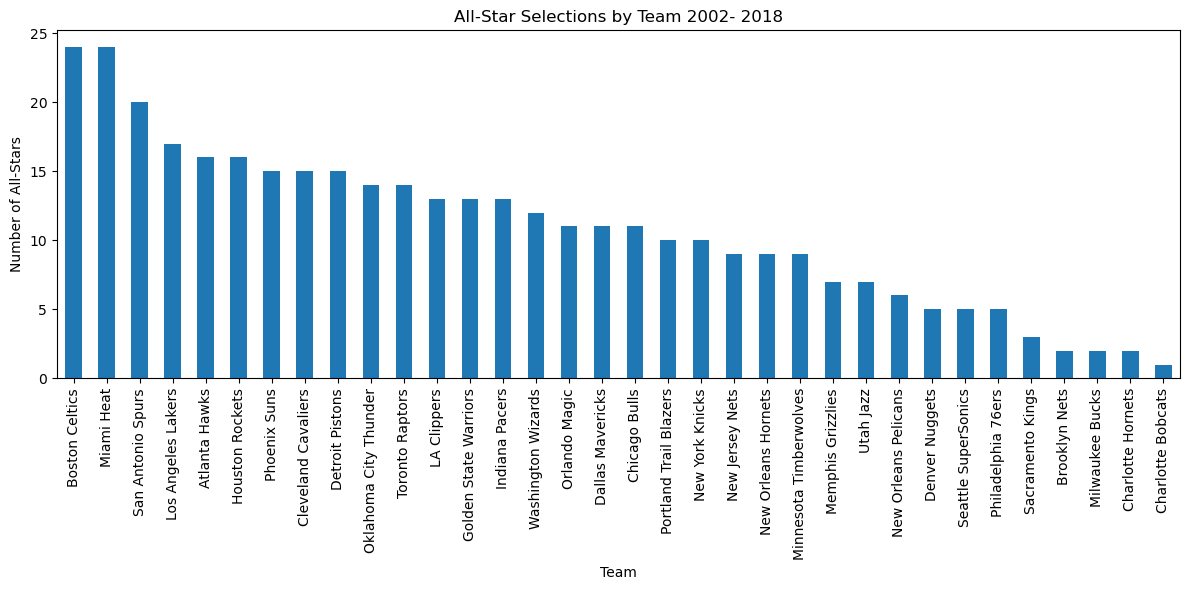

In [425]:
sum_teams.plot(kind='bar', figsize=(12,6), title='All-Star Selections by Team 2002- 2018')
plt.xlabel('Team')
plt.ylabel('Number of All-Stars')
plt.tight_layout()
plt.show()


In [439]:
cor_map = matched_players.select_dtypes(include='number').corr()
cor_map

,age,g,gs,mp,fg,fga,fg%,3p,3pa,3p%,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,salary
age,1.000000,-0.111819,-0.124159,-0.353342,-0.272906,-0.239322,-0.046756,-0.026761,-0.037895,-0.001064,...,-0.158757,-0.094762,-0.121187,-0.032348,-0.242685,-0.082462,-0.199429,-0.243175,-0.299108,0.434744
g,-0.111819,1.000000,0.996497,0.259444,0.069332,0.041635,0.057384,0.085476,0.066203,0.064992,...,0.084209,0.107084,0.104056,0.019539,0.099247,0.025358,-0.098736,0.083663,0.084327,-0.148460
gs,-0.124159,0.996497,1.000000,0.259037,0.070474,0.040850,0.061996,0.094277,0.074954,0.068957,...,0.085129,0.109750,0.106279,0.023981,0.096977,0.024269,-0.096117,0.080038,0.087513,-0.135707
mp,-0.353342,0.259444,0.259037,1.000000,0.456276,0.520307,-0.206691,0.138290,0.177166,0.084111,...,0.015935,0.054602,0.043177,0.202926,0.398754,-0.095689,0.318374,0.074856,0.490606,-0.188678
fg,-0.272906,0.069332,0.070474,0.456276,1.000000,0.911449,0.095364,0.158757,0.189921,0.083407,...,-0.055949,0.049435,0.015666,0.010852,0.119536,-0.044975,0.348122,0.065947,0.938199,0.186812
fga,-0.239322,0.041635,0.040850,0.520307,0.911449,1.000000,-0.307523,0.364707,0.424317,0.184054,...,-0.248727,-0.134550,-0.181142,0.132420,0.239959,-0.236866,0.392739,-0.022151,0.918691,0.136174
fg%,-0.046756,0.057384,0.061996,-0.206691,0.095364,-0.307523,1.000000,-0.507593,-0.571612,-0.286404,...,0.497336,0.440826,0.484010,-0.322074,-0.324934,0.458480,-0.139131,0.234106,-0.057302,0.105124
3p,-0.026761,0.085476,0.094277,0.138290,0.158757,0.364707,-0.507593,1.000000,0.986070,0.535559,...,-0.606699,-0.428789,-0.512606,0.310988,0.282194,-0.519701,0.165503,-0.270313,0.357300,0.085330
3pa,-0.037895,0.066203,0.074954,0.177166,0.189921,0.424317,-0.571612,0.986070,1.000000,0.512836,...,-0.618897,-0.436524,-0.522380,0.341426,0.332858,-0.533318,0.219754,-0.265862,0.392248,0.104148
3p%,-0.001064,0.064992,0.068957,0.084111,0.083407,0.184054,-0.286404,0.535559,0.512836,1.000000,...,-0.484207,-0.368369,-0.426219,0.250140,0.114677,-0.422227,0.031766,-0.240016,0.175720,-0.023518


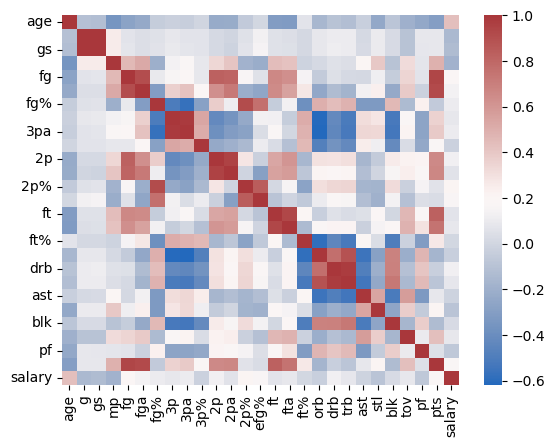

In [437]:
sns.heatmap(cor_map, cmap='vlag')
plt.show()